# --> Linear Models for global life expectancy predictions

# Libraries used for Analysis

<h2><center>Global Life Expectancy Predictions</center></h2>
<h1><center>Institute: Ironhack</center></h1>
<h1><center>Hamid_Daft_Berlin_2021</center></h1>


In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats
from IPython.core.display import display, HTML
%matplotlib inline
%run functions.ipynb

# Data importing and start of EDA

  <body>
 <center><h1>Motivation & Introduction</h1></center>
 </body>
 <body>
         <center><img src="question" alt="Simply Easy Learning" width="200"
         height="80"></center>
   </body> 
   

# What were the challenges Global health facing to improve the Life expectancy before the invasion of COVID-19?

In [37]:
data = read_csv('Life Expectancy Data.csv')
data.columns = [i.rstrip().lstrip().strip().replace(' ','_').lower() for i in data.columns]
shape = data.shape
print(data.duplicated().sum())
print(shape)

0
(2938, 22)


<body>
 <r><h1>Challenges:</h1></r>
 </body>
 <body>
         <center><img src="question1" alt="Simply Easy Learning" width="200"
         height="80"></center>
   </body> 
<h1>1. How to generalize the global Life Expectancy?<h1>
<h1>2. What are the common challenges between the countries?<h1> 



# Through analysis got the information that following countries were stated wrong.

In [38]:
France = (data[data['country'] == 'France']['status']).index
Greece = (data[data['country'] == 'Greece']['status']).index
Canada = (data[data['country'] == 'Canada']['status']).index
Estonia = (data[data['country'] == 'Estonia']['status']).index
for index,index1,index2,index3 in zip(France,Greece,Canada,Estonia):
    data.iloc[index,2]= 'Developed'
    data.iloc[index1,2] = 'Developed'
    data.iloc[index2,2] = 'Developed'
    data.iloc[index3,2] = 'Developed'

# Getting Overview of missing values 

In [39]:
for i in data.columns:
    if (data[i].isna().sum()/data.shape[0]*100) > 0:
           print('The percentage of nulls in {} column: {}%'
                  .format(i,(data[i].isna().sum()/data.shape[0]*100)))

The percentage of nulls in life_expectancy column: 0.3403675970047651%
The percentage of nulls in adult_mortality column: 0.3403675970047651%
The percentage of nulls in alcohol column: 6.603131381892443%
The percentage of nulls in hepatitis_b column: 18.82232811436351%
The percentage of nulls in bmi column: 1.1572498298162015%
The percentage of nulls in polio column: 0.6466984343090538%
The percentage of nulls in total_expenditure column: 7.6923076923076925%
The percentage of nulls in diphtheria column: 0.6466984343090538%
The percentage of nulls in gdp column: 15.248468345813478%
The percentage of nulls in population column: 22.19196732471069%
The percentage of nulls in thinness__1-19_years column: 1.1572498298162015%
The percentage of nulls in thinness_5-9_years column: 1.1572498298162015%
The percentage of nulls in income_composition_of_resources column: 5.684138869979578%
The percentage of nulls in schooling column: 5.547991831177672%


# Splitting the data on the basis of data types

In [40]:
data2 = data
x_num,x_cat = data_split(data2)
x_num_null = x_num.copy()
x_cat.columns

Index(['country', 'status'], dtype='object')

# Getting overview of the original distribustion of data

In [41]:
#for i in x_num_null.columns:
   # sns.displot(x_num_null[i])

# Filling Null values with KNNImputer

In [42]:
x = x_num
x = np.array(x)
imputer = KNNImputer(n_neighbors=1)
x = imputer.fit_transform(x)
x_num = pd.DataFrame(x,columns = x_num.columns)

# Checking the impact on distribution after filling the Null values

In [43]:
#for i in x_num.columns:
   # sns.displot(x_num[i])

# Getting overview of multicolinearity of features against the target variable
# (Life Expectancy)

In [44]:
#my_heatMap(x_num)

# Making copy of numerical variables 

In [45]:
x_num1 = x_num.copy()

# Removing the correlated variables with correlation value higher
# than 0.65

In [46]:
corr_matrix = x_num1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

# Drop features 
x_num1.drop(to_drop, axis=1, inplace=True)

# Checking distribution after removing the correlated variables 

In [47]:
x_num1.columns
#for column in x_num1.columns:
  #  sns.displot(x_num1[column])

Index(['year', 'life_expectancy', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'polio',
       'total_expenditure', 'hiv/aids', 'population', 'thinness__1-19_years'],
      dtype='object')

# Removing the variables which have impact on Life 
# Expactancy locally and also separating the target 
# (Life Expectancy) 

In [48]:
y = x_num1['life_expectancy']
x_num1 = x_num1.drop('life_expectancy',axis = 1)
x_num1 = x_num1.drop('percentage_expenditure',axis = 1)
x_num1 = x_num1.drop('infant_deaths',axis = 1)
x_num1 = x_num1.drop('measles',axis = 1)
#x_num1 = x_num1.drop('population',axis = 1)
#x_num1 = x_num1.drop('year',axis = 1)
#-->x_num1 = x_num1.drop('bmi',axis = 1)
#x_num1 = x_num1.drop('hiv/aids',axis = 1)
#x_num1 = x_num1.drop('polio',axis = 1)
#x_num1 = x_num1.drop('diphtheria',axis = 1)
#x_num1 = x_num1.drop('thinness__1-19_years',axis = 1)

# Applying box_cox transformation on remaining numerical variables and storing the data in  x_boxcox object

In [49]:
x_boxcox = x_num1.copy()
for column in x_boxcox.columns:
    #fig = plt.figure()
    #ax2 = fig.add_subplot(212)
    x_boxcox[column], _ = stats.boxcox(x_boxcox[column])
    #prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    #ax2.set_title(column)
    #sns.distplot(x_boxcox[column])
    #plt.show()


# Checking for variance inflation with the threshold 3

In [50]:
x_boxcox = VIF(x_boxcox)


3


# Bivariate analysis before applying the models

In [51]:
# Plotting
def bivariate_analysis(d,target):
    fig, ax = plt.subplots(1,3, figsize = (14,3))
    for i, column in enumerate(d.columns):
        sns.scatterplot(target,d[column], ax=ax[i])
        ax[i].set_title(f'Scatter plot of {column}')    

 <body>
 <center><h1>Bivariate Analysis</h1></center>
 </body>

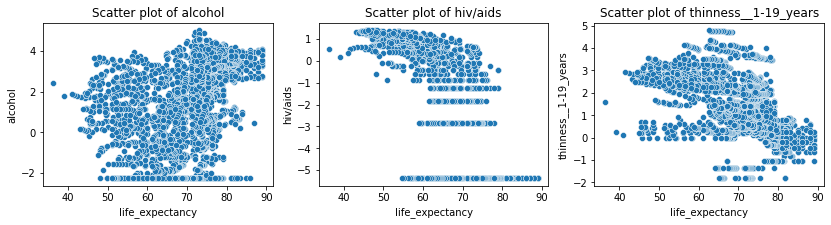

In [52]:
bivariate_analysis(x_boxcox,y)

# checking for multicolinearity with respect to life 
# expectancy

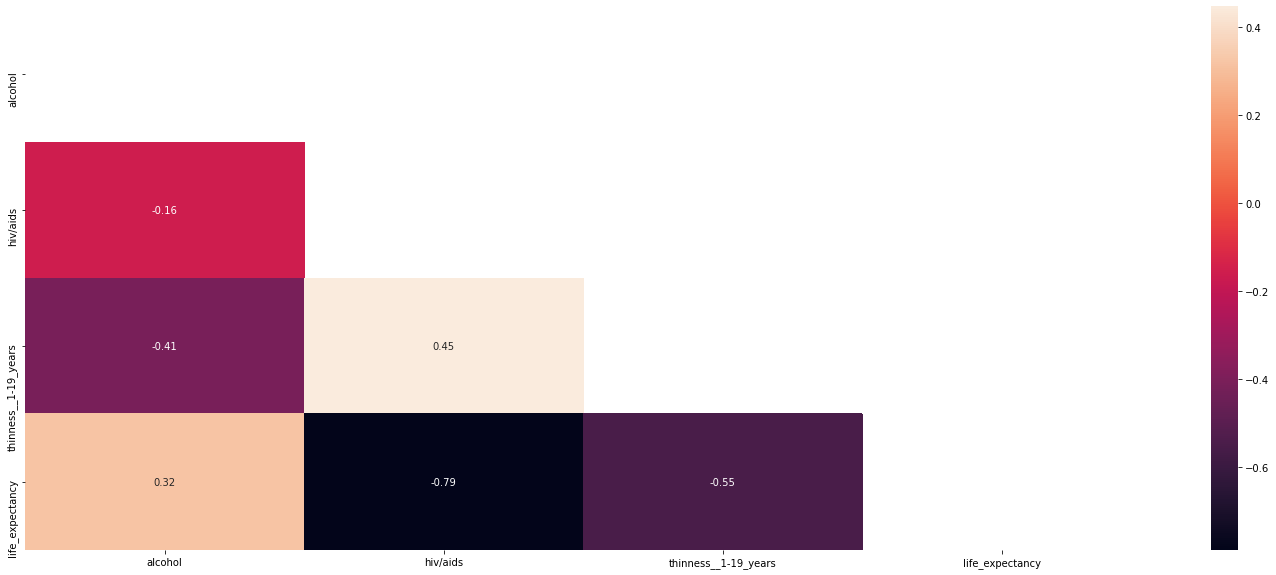

,alcohol,hiv/aids,thinness__1-19_years,life_expectancy
count,2938.000000,2938.000000,2938.000000,2938.00000
mean,1.243337,-3.324507,1.424787,69.24418
std,2.044361,2.695812,1.285521,9.51651
min,-2.266568,-5.387825,-1.826711,36.30000
25%,-0.383048,-5.387825,0.493921,63.20000
50%,1.591300,-5.387825,1.394961,72.10000
75%,2.990014,-0.240332,2.444893,75.70000
max,5.024743,1.406382,4.798985,89.00000


In [53]:
x_boxcox['life_expectancy'] = y
my_heatMap(x_boxcox)
x_boxcox.describe()

# Applying standard scaler to the data for model implementation 

In [54]:
#x_boxcox.drop(['alcohol'],axis = 1, inplace=True)
#x_boxcox.drop(['thinness__1-19_years'],axis = 1, inplace=True)
#x_boxcox.drop(['hiv/aids'],axis = 1, inplace=True)
y1 = x_boxcox['life_expectancy']
x_boxcox.drop('life_expectancy',axis = 1,inplace = True)
x = x_boxcox
scaler = StandardScaler().fit(x)
transform = scaler.transform(x)

# Splitting data into training and test data with the test size 35%

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
     transform, y1, test_size=0.35, random_state=0)

# Linear Regression model implementation 

In [56]:
model = LinearRegression().fit(X_train, y_train)
Lm_score = cross_val_score(model, X_train, y_train, cv=5)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
np.mean(Lm_score)
#model.score(X_test,y_test)

0.6672816642770449


0.6889067000948709

# Checking summary of Linear regression model and found out, the Linear Regression  model  is not BLUE (Best Linear Unbiased Estimator)

 <body>
 <center><h1>Model Summary</h1></center>
 </body>

In [57]:
model1 = sm.OLS(y,x).fit()

In [58]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              7694.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        18:13:01   Log-Likelihood:                         -13441.
No. Observations:                2938   AIC:                                  2.689e+04
Df Residuals:                    2935   BIC:                                  2.691e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
alcohol                  6.0884      0.208     29.288      0.000       5.681       6.496
hiv/aids                -9.2569      0.125    -74.294      0.000      -9.501      -9.013
thinness__1-19_years    15.8137      0.245     64.478      0.000      15.333      16.295
==============================================================================
Omnibus:                       17.101   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.281
Skew:                           0.188   Prob(JB):                     0.000177
Kurtosis:                       3.016   Cond. No.                         2.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 <body>
 <center><h1>Model Summary</h1></center>
 </body>
* Reference for summary interpretation:
https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

# Random Forest Regressor implementation and 
# Extracting the impact of each considered variable

In [24]:
model2 = RandomForestRegressor(max_depth = 10).fit(X_train,y_train)
my_features = model2.feature_importances_
y_pred1 = model2.predict(X_test)
my_features = my_features.reshape(-1,1)
index = []
value = []
for i, val in enumerate(my_features):
    if val > 0:
        index.append(i)
        value.append(val)
features = {}
Rand_Forest_considered = []
for i, ii in zip(index,value):
    features[x_boxcox.columns[i]] = round(float(ii),3)
    Rand_Forest_considered.append(x_boxcox.columns[i])
RF_scores = cross_val_score(model2, X_train, y_train, cv=5)
mean = np.mean(RF_scores)
print('The features weights in Random Forest model are {}'.format(features))
print('The mean score of Random Forest Regressor at max_depth = 10 is {}'.format(mean))

The features weights in Random Forest model are {'alcohol': 0.135, 'hiv/aids': 0.709, 'thinness__1-19_years': 0.156}
The mean score of Random Forest Regressor at max_depth = 10 is 0.85375364794814


# KNeighbors Regressor model implemntation with K = 2

In [25]:
model3 = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
y_pred2 = model3.predict(X_test)
KN_scores = cross_val_score(model3, X_train, y_train, cv=5)
mean1 = np.mean(KN_scores)           
print('The mean score of KNeighbors Regressor with neighbors = 2 is {}'.format(mean))

The mean score of KNeighbors Regressor with neighbors = 2 is 0.85375364794814


In [26]:
def Model_Scores():
    print(f'Linear Regression model score: {round(np.mean(Lm_score),2)}')
    print(f'Random Forest Regressor model score: {round(mean,2)}')
    print(f'KNeighbors Regressor model score: {round(mean1,2)}')
    

In [27]:
Model_Scores()

Linear Regression model score: 0.69
Random Forest Regressor model score: 0.85
KNeighbors Regressor model score: 0.84


 <body>
 <center><h1>Model Scores</h1></center>
 </body>

*  Linear Regression model mean R_score: 69%
*  Random Forest Regressor model mean R_score: 86%
*  KNeighbors Regressor model mean R_score: 84%

# Putting test data into a data frame with other informative 
# variables present in actual data

In [28]:
pred_data = pd.DataFrame({'Actual_life': y_test,'Linear_pred': np.round(y_pred,1), 'Rand_forest':
                          np.round(y_pred1,1), 'KNeighbors': np.round(y_pred2,1)})
index_country = pred_data['Actual_life'].index
country = []
status = []
alcohol = []
hiv = []
thinness = []
year = []
for i in index_country:
    country.append(data['country'].iloc[i])
    status.append(data['status'].iloc[i])
    alcohol.append(data['alcohol'].iloc[i])
    hiv.append(data['hiv/aids'].iloc[i])
    thinness.append(data['thinness__1-19_years'].iloc[i])
    year.append(data['year'].iloc[i])
pred_data['country'] = country
pred_data['status'] = status
pred_data['alcohol'] = alcohol
pred_data['hiv/aids'] = hiv
pred_data['thinnes_1_19'] = thinness
pred_data['year'] = year

# Function for mean absolute error measure by 
# country

In [29]:
def Absolute_error_by_country():
    country = input('Your country name: ')
    data = pred_data[pred_data['country'] == country]
    print('Mean Absolute Error of Linear Regression: '+str(round(mean_absolute_error(pred_data[pred_data['country'] == country]['Actual_life'],
                   pred_data[pred_data['country'] == country]['Linear_pred']),2)))
    print('Mean Absolute Error of Random Forest: '+str(round(mean_absolute_error(pred_data[pred_data['country'] == country]['Actual_life'],
                   pred_data[pred_data['country'] == country]['Rand_forest']),2)))
    print('Mean Absolute Error of KNeighbors: '+str(round(mean_absolute_error(pred_data[pred_data['country'] == country]['Actual_life'],
                   pred_data[pred_data['country'] == country]['KNeighbors']),2)))
    fig, ax = plt.subplots(1,3, figsize = (15,4))
    fig.suptitle(f'{country} Life Expectancy prediction')
    columns = ['Linear_pred','Rand_forest','KNeighbors']
    for i,column in enumerate(columns):
        #ax[i].set_title(column+' predictions')
        ax[i].plot(range(0,pred_data[pred_data['country'] == country].shape[0]),pred_data[pred_data['country'] == country]['Actual_life']
                   , 'o',label = 'Actual_life',)
        ax[i].plot(range(0,pred_data[pred_data['country'] == country].shape[0]),pred_data[pred_data['country'] == country][column],'x',label = column)
        ax[i].set(ylabel = column)
        ax[i].legend()
    return data

# Function for mean absolute error measure by 
# country's status

In [30]:
def Absolute_error_by_status():
    status = input('The status of countries: ')
    print('Mean Absolute Error of Linear Regression for '+str(status)+': ' +str(round(mean_absolute_error(pred_data[pred_data['status'] == status]['Actual_life'],
                   pred_data[pred_data['status'] == status]['Linear_pred']),2)))
    print('Mean Absolute Error of Random Forest for ' +str(status)+': ' +str(round(mean_absolute_error(pred_data[pred_data['status'] == status]['Actual_life'],
                   pred_data[pred_data['status'] == status]['Rand_forest']),2)))
    print('Mean Absolute Error of KNeighbors for '+str(status)+': '+str(round(mean_absolute_error(pred_data[pred_data['status'] == status]['Actual_life'],
                   pred_data[pred_data['status'] == status]['KNeighbors']),2)))
    fig, ax = plt.subplots(1,3, figsize = (15,4))
    fig.suptitle(f'{status} countries Life Expectancy prediction')
    columns = ['Linear_pred','Rand_forest','KNeighbors']
    for i,column in enumerate(columns):
        #ax[i].set_title(column+' predictions')
        ax[i].plot(range(0,pred_data[pred_data['status'] == status].shape[0]),pred_data[pred_data['status'] == status]['Actual_life']
                   , 'o',label = 'Actual_life',)
        ax[i].plot(range(0,pred_data[pred_data['status'] == status].shape[0]),pred_data[pred_data['status'] == status][column],'x',label = column)
        ax[i].set(ylabel = column)
        ax[i].legend()

# Function for mean absolute error measure Globally

In [31]:
def Absolute_error_global():
    print('Mean Absolute Error of Linear Regression in global life expectancy: ' +str(round(mean_absolute_error(pred_data['Actual_life'],
                   pred_data['Linear_pred']),2)))
    print('Mean Absolute Error of Random Forest in global life expectancy: ' +str(round(mean_absolute_error(pred_data['Actual_life'],
                   pred_data['Rand_forest']),2)))
    print('Mean Absolute Error of KNeighbors in global life expectancy: '+str(round(mean_absolute_error(pred_data['Actual_life'],
                   pred_data['KNeighbors']),2)))
    fig, ax = plt.subplots(1,3, figsize = (15,4))
    fig.suptitle('Global Life Expectancy predictions')
    columns = ['Linear_pred','Rand_forest','KNeighbors']
    for i,column in enumerate(columns):
        #ax[i].set_title(column+' predictions')
        ax[i].plot(range(0,pred_data.shape[0]),pred_data['Actual_life']
                   , 'o',label = 'Actual_life',)
        ax[i].plot(range(0,pred_data.shape[0]),pred_data[column],'x',label = column)
        ax[i].set(ylabel = column)
        ax[i].legend()

 <body>
 <center><h1>Mean Absolute Error on Test Data</h1></center>
 </body>

Mean Absolute Error of Linear Regression in global life expectancy: 4.15
Mean Absolute Error of Random Forest in global life expectancy: 2.4
Mean Absolute Error of KNeighbors in global life expectancy: 2.23


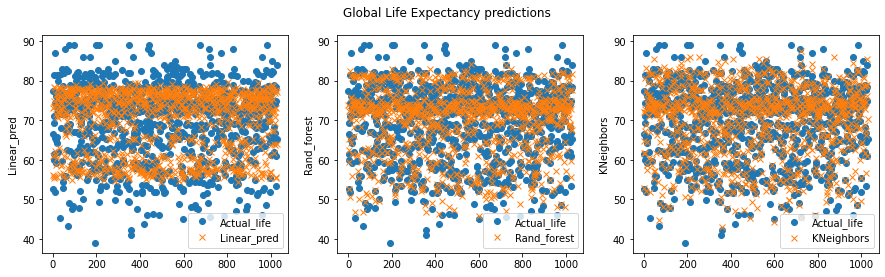

In [32]:
Absolute_error_global()  

 <body>
 <center><h1>Mean Absolute Error by Status on Test Data</h1></center>
 </body>

In [33]:
#Absolute_error_by_status()

 <body>
 <center><h1>Mean Absolute Error by country on Test Data</h1></center>
 </body>

Your country name: Germany
Mean Absolute Error of Linear Regression: 4.71
Mean Absolute Error of Random Forest: 2.86
Mean Absolute Error of KNeighbors: 2.46


,Actual_life,Linear_pred,Rand_forest,KNeighbors,country,status,alcohol,hiv/aids,thinnes_1_19,year
995,89.0,77.6,80.9,83.5,Germany,Developed,11.03,0.1,1.1,2014
997,86.0,77.6,80.1,80.5,Germany,Developed,11.18,0.1,1.1,2012
1003,79.6,77.7,79.5,78.8,Germany,Developed,11.76,0.1,1.1,2006
998,85.0,77.6,80.1,80.5,Germany,Developed,11.20,0.1,1.1,2011
1009,78.0,77.7,77.6,78.4,Germany,Developed,12.91,0.1,1.2,2000
1005,79.1,77.7,79.5,78.8,Germany,Developed,11.83,0.1,1.1,2004
1002,79.8,77.6,80.0,79.6,Germany,Developed,11.50,0.1,1.1,2007


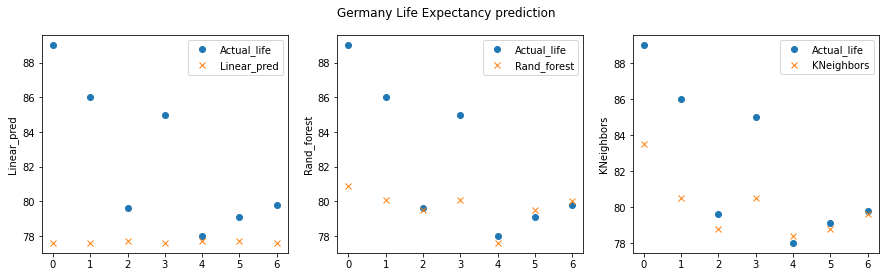

In [35]:
Absolute_error_by_country() 

<h2><center>THANK YOU.....</center></h2>